In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import statistics
import warnings
import seaborn as sns
import random as rd
import sys
sys.path.append('../scripts')
from cleaner import CleanDataFrame
from plotter import Plotter
from logger import logger
cleaner = CleanDataFrame()
plotter = Plotter()


In [2]:
store_df = pd.read_csv('../data/store.csv')
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [3]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [4]:
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [5]:
cleaner.percent_missing(store_df)

2022-05-25 17:56:02,323:logger:The dataset contains 21.01 % missing values.


In [6]:
logger.info('unique values for CompetitionOpenSinceMonth  ' + str(store_df['CompetitionOpenSinceMonth'].unique()))
logger.info('unique values for CompetitionOpenSinceYear  ' + str(store_df['CompetitionOpenSinceYear'].unique()))
logger.info('unique values for promo2sinceweek  ' + str(store_df['Promo2SinceWeek'].unique()))
logger.info('unique values for Promo2SinceYear  ' + str(store_df['Promo2SinceYear'].unique()))
logger.info('unique values for PromoInterval  ' + str(store_df['PromoInterval'].unique()))

2022-05-25 17:56:03,120:logger:unique values for CompetitionOpenSinceMonth  [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
2022-05-25 17:56:03,123:logger:unique values for CompetitionOpenSinceYear  [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
2022-05-25 17:56:03,126:logger:unique values for promo2sinceweek  [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
2022-05-25 17:56:03,130:logger:unique values for Promo2SinceYear  [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
2022-05-25 17:56:03,134:logger:unique values for PromoInterval  [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


# as we can see on the above output
       - missing values match between corelated columns in counts that is a good sign
       - Competition open columns can be filled with the most earliest year and month because we do not have the year and month of opening the store we can not be sure
       - Promo2sinceweek and Promo2sinceyear can be filled with 0 as PromoInterval shows there were no promotions for those stores
       - Promointerval can be filled with string other than month name comma separated string we will use "Nan,Nan,Nan,Nan" 

In [7]:
store_df  = cleaner.fix_missing_values(store_df,['CompetitionOpenSinceYear'],1990) 
store_df  = cleaner.fix_missing_values(store_df,['CompetitionOpenSinceMonth'],1) 
store_df  = cleaner.fix_missing_values(store_df,['Promo2SinceWeek','Promo2SinceYear'],0) 
store_df  = cleaner.fix_missing_values(store_df,['PromoInterval'],"Nan,Nan,Nan,Nan") 
store_df.isna().sum()

2022-05-25 17:56:03,566:logger:successfully fixed missing values of CompetitionOpenSinceYear column with 1990
2022-05-25 17:56:03,569:logger:successfully fixed missing values of CompetitionOpenSinceMonth column with 1
2022-05-25 17:56:03,571:logger:successfully fixed missing values of Promo2SinceWeek column with 0
2022-05-25 17:56:03,574:logger:successfully fixed missing values of Promo2SinceYear column with 0
2022-05-25 17:56:03,577:logger:successfully fixed missing values of PromoInterval column with Nan,Nan,Nan,Nan


Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          3
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [8]:
store_df  = cleaner.fix_missing_values(store_df,['CompetitionDistance'],store_df['CompetitionDistance'].max()) 
store_df.isna().sum()

2022-05-25 17:56:03,935:logger:successfully fixed missing values of CompetitionDistance column with 75860.0


Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [9]:
store_df = cleaner.fix_datatypes(store_df)
store_df.info()

2022-05-25 17:56:04,284:logger:successfully changed PromoInterval column to string
2022-05-25 17:56:04,290:logger:successfully changed StoreType column to string
2022-05-25 17:56:04,292:logger:successfully changed Assortment column to string
2022-05-25 17:56:04,294:logger:successfully changed StateHoliday column to string
2022-05-25 17:56:04,296:logger:successfully changed Date column to datetime
2022-05-25 17:56:04,301:logger:successfully changed CompetitionOpenSinceYear column to integer
2022-05-25 17:56:04,304:logger:successfully changed CompetitionOpenSinceMonth column to integer
2022-05-25 17:56:04,306:logger:successfully changed Promo2SinceWeek column to integer
2022-05-25 17:56:04,308:logger:successfully changed Promo2SinceYear column to integer
2022-05-25 17:56:04,312:logger:successfully finished fixing datatype


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   string 
 2   Assortment                 1115 non-null   string 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   int64  
 5   CompetitionOpenSinceYear   1115 non-null   int64  
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   int64  
 8   Promo2SinceYear            1115 non-null   int64  
 9   PromoInterval              1115 non-null   string 
dtypes: float64(1), int64(6), string(3)
memory usage: 87.2 KB


In [10]:
store_df = cleaner.drop_duplicates(store_df)
store_df

2022-05-25 17:56:04,793:logger:successfully droped duplicates


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
1,2,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9,2009,0,0,0,"Nan,Nan,Nan,Nan"
4,5,a,a,29910.0,4,2015,0,0,0,"Nan,Nan,Nan,Nan"
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6,2014,1,31,2013,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4,2006,0,0,0,"Nan,Nan,Nan,Nan"
1112,1113,a,c,9260.0,1,1990,0,0,0,"Nan,Nan,Nan,Nan"
1113,1114,a,c,870.0,1,1990,0,0,0,"Nan,Nan,Nan,Nan"


In [11]:
train_df = pd.read_csv('../data/train.csv')
train_df

C:\Users\User\AppData\Local\Temp\ipykernel_2916\847756438.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('../data/train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [12]:
cleaner.percent_missing(train_df)

2022-05-25 17:56:08,381:logger:The dataset contains 0.0 % missing values.


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [14]:
logger.info('unique values for StateHoliday  ' + str(train_df['StateHoliday'].unique()))

2022-05-25 17:56:09,752:logger:unique values for StateHoliday  ['0' 'a' 'b' 'c' 0]


As we can see above StateHoliday can be changes to string type because there is an integer value and we can change the value 0 to None ('0') so that the data has no stateholidays 

In [15]:

# train_df.loc[train_df["StateHoliday"] == 0, "StateHoliday"] = "0"
train_df = cleaner.replace_value(train_df,"StateHoliday",0,"0")
logger.info('unique values for StateHoliday  ' + str(train_df['StateHoliday'].unique()))

2022-05-25 17:56:10,071:logger:successfully replaced value of StateHoliday column with 0
2022-05-25 17:56:10,198:logger:unique values for StateHoliday  ['0' 'a' 'b' 'c']


In [16]:
train_df = cleaner.fix_datatypes(train_df)
train_df.info()

2022-05-25 17:56:10,330:logger:successfully changed PromoInterval column to string
2022-05-25 17:56:10,333:logger:successfully changed StoreType column to string
2022-05-25 17:56:10,335:logger:successfully changed Assortment column to string
2022-05-25 17:56:10,398:logger:successfully changed StateHoliday column to string
2022-05-25 17:56:11,085:logger:successfully changed Date column to datetime
2022-05-25 17:56:11,087:logger:successfully changed CompetitionOpenSinceYear column to integer
2022-05-25 17:56:11,088:logger:successfully changed CompetitionOpenSinceMonth column to integer
2022-05-25 17:56:11,092:logger:successfully changed Promo2SinceWeek column to integer
2022-05-25 17:56:11,096:logger:successfully changed Promo2SinceYear column to integer
2022-05-25 17:56:11,100:logger:successfully finished fixing datatype


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  string        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), string(1)
memory usage: 69.8 MB


In [17]:
train_df = cleaner.drop_duplicates(train_df)
train_df

2022-05-25 17:56:12,468:logger:successfully droped duplicates


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [18]:
test_df = pd.read_csv('../data/test.csv')
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [19]:
cleaner.percent_missing(test_df)

2022-05-25 17:56:13,293:logger:The dataset contains 0.0 % missing values.


In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [21]:
test_df = cleaner.fix_datatypes(test_df)
test_df.info()

2022-05-25 17:56:13,939:logger:successfully changed PromoInterval column to string
2022-05-25 17:56:13,944:logger:successfully changed StoreType column to string
2022-05-25 17:56:13,946:logger:successfully changed Assortment column to string
2022-05-25 17:56:13,952:logger:successfully changed StateHoliday column to string
2022-05-25 17:56:13,967:logger:successfully changed Date column to datetime
2022-05-25 17:56:13,968:logger:successfully changed CompetitionOpenSinceYear column to integer
2022-05-25 17:56:13,969:logger:successfully changed CompetitionOpenSinceMonth column to integer
2022-05-25 17:56:13,970:logger:successfully changed Promo2SinceWeek column to integer
2022-05-25 17:56:13,975:logger:successfully changed Promo2SinceYear column to integer
2022-05-25 17:56:13,977:logger:successfully finished fixing datatype


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41077 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  string        
 7   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), string(1)
memory usage: 2.5 MB


In [22]:
test_df = cleaner.drop_duplicates(test_df)
test_df

2022-05-25 17:56:14,189:logger:successfully droped duplicates


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [23]:
train_df['Week_Number'] = train_df['Date'].dt.isocalendar().week
train_df['Year'] = train_df['Date'].dt.year
train_df['Day'] = train_df['Date'].dt.day
train_df['Month'] = train_df['Date'].dt.month
train_df['weekday'] = train_df['DayOfWeek'].apply(lambda x: 0 if x >5 else 1)
train_df['day_of_year'] = train_df['Date'].dt.dayofyear
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Week_Number,Year,Day,Month,weekday,day_of_year
0,1,5,2015-07-31,5263,555,1,1,0,1,31,2015,31,7,1,212
1,2,5,2015-07-31,6064,625,1,1,0,1,31,2015,31,7,1,212
2,3,5,2015-07-31,8314,821,1,1,0,1,31,2015,31,7,1,212
3,4,5,2015-07-31,13995,1498,1,1,0,1,31,2015,31,7,1,212
4,5,5,2015-07-31,4822,559,1,1,0,1,31,2015,31,7,1,212


In [24]:
test_df = test_df
test_df['Week_Number'] = test_df['Date'].dt.week
test_df['Year'] = test_df['Date'].dt.year
test_df['Day'] = test_df['Date'].dt.day
test_df['Month'] = test_df['Date'].dt.month
test_df['weekday'] = test_df['DayOfWeek'].apply(lambda x: 0 if x >5 else 1)
test_df['day_of_year'] = test_df['Date'].dt.dayofyear
test_df

C:\Users\User\AppData\Local\Temp\ipykernel_2916\2324853985.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  test_df['Week_Number'] = test_df['Date'].dt.week


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Week_Number,Year,Day,Month,weekday,day_of_year
0,1,1,4,2015-09-17,1.0,1,0,0,38,2015,17,9,1,260
1,2,3,4,2015-09-17,1.0,1,0,0,38,2015,17,9,1,260
2,3,7,4,2015-09-17,1.0,1,0,0,38,2015,17,9,1,260
3,4,8,4,2015-09-17,1.0,1,0,0,38,2015,17,9,1,260
4,5,9,4,2015-09-17,1.0,1,0,0,38,2015,17,9,1,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,31,2015,1,8,0,213
41084,41085,1112,6,2015-08-01,1.0,0,0,0,31,2015,1,8,0,213
41085,41086,1113,6,2015-08-01,1.0,0,0,0,31,2015,1,8,0,213
41086,41087,1114,6,2015-08-01,1.0,0,0,0,31,2015,1,8,0,213


In [25]:
train_merged_df = pd.merge(train_df, store_df, how='inner', on='Store')
train_merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Week_Number,...,day_of_year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,31,...,212,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
1,1,4,2015-07-30,5020,546,1,1,0,1,31,...,211,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
2,1,3,2015-07-29,4782,523,1,1,0,1,31,...,210,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
3,1,2,2015-07-28,5011,560,1,1,0,1,31,...,209,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
4,1,1,2015-07-27,6102,612,1,1,0,1,31,...,208,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"


In [26]:
test_merged_df = pd.merge(test_df, store_df, how='inner', on='Store')
test_merged_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Week_Number,Year,...,day_of_year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,38,2015,...,260,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
1,857,1,3,2015-09-16,1.0,1,0,0,38,2015,...,259,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
2,1713,1,2,2015-09-15,1.0,1,0,0,38,2015,...,258,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
3,2569,1,1,2015-09-14,1.0,1,0,0,38,2015,...,257,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
4,3425,1,7,2015-09-13,0.0,0,0,0,37,2015,...,256,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"


In [27]:
# Analysis

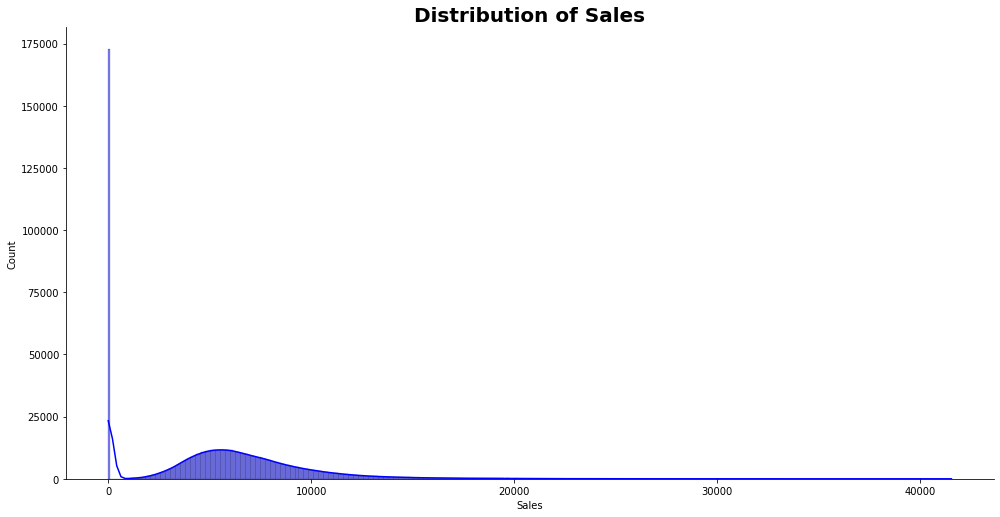

2022-05-25 17:57:05,370:logger:successfully displayed histogram plot


In [28]:
plotter.plot_hist(train_merged_df, 'Sales', 'blue')

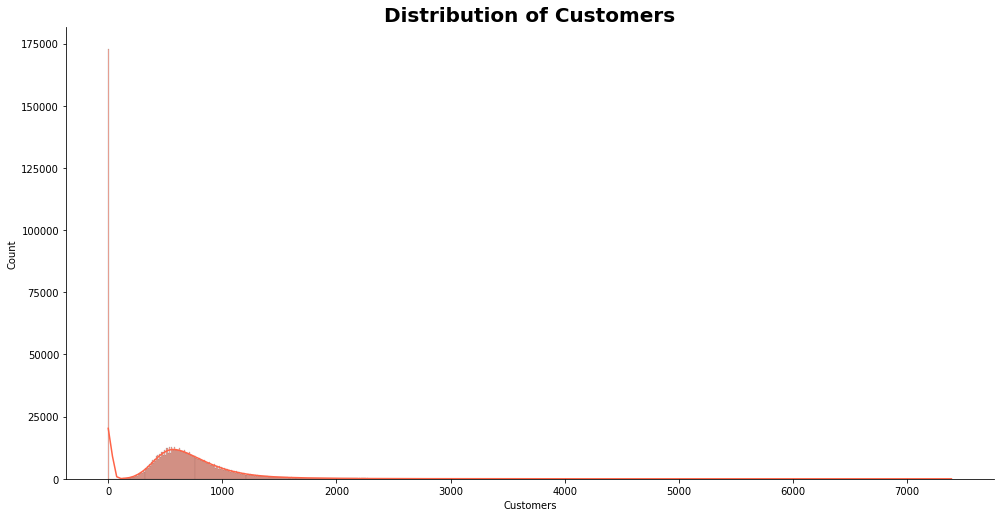

2022-05-25 17:57:31,120:logger:successfully displayed histogram plot


In [29]:
plotter.plot_hist(train_merged_df, 'Customers', 'tomato')

In [30]:
train_merged_df.groupby(by=['Store']).aggregate({'Sales': 'sum','Customers': 'sum'})
train_merged_df.groupby(by=['Year']).aggregate({'Sales': 'sum','Customers': 'sum'})
year_month = train_merged_df.groupby(['Year','Month'], sort=False, as_index=False).aggregate({'Sales': 'sum','Customers': 'sum'})
# logger.info('unique values for StateHoliday  ' + str(train_merged_df['Year'].unique()))
year_month

,Year,Month,Sales,Customers
0,2015,7,212322616,22253888
1,2015,6,207363373,21645129
2,2015,5,189143897,20193848
3,2015,4,197918886,21053991
4,2015,3,205631683,21809641
5,2015,2,178275458,19481381
6,2015,1,198843730,21110481
7,2014,12,202120592,20800624
8,2014,11,173327953,18686232
9,2014,10,164216398,18734892


<AxesSubplot:xlabel='year-month'>

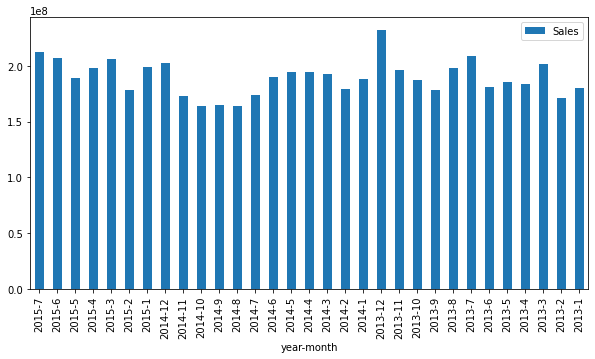

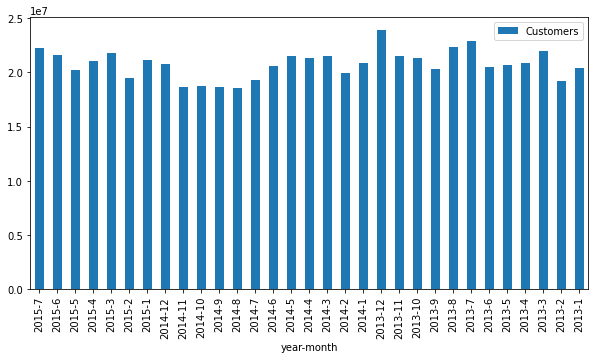

In [31]:
# df[['period', 'A', 'B', 'C']].plot(x='period', kind='bar', stacked=True)
df = year_month.copy()
# df = pd.DataFrame(data[1:],columns=data[0])
# df.set_index(['Year','Month'], inplace=True)

df['year-month'] = df.apply(lambda row: str(row.Year)+'-' + str(row.Month), axis=1)
df.head()
# piv = df.pivot(columns="Sales").plot(kind="bar", subplots=True)
# plt.tight_layout()
# plt.show()
# ax = df.plot(x=['Year', 'Month'],y='Sales',kind='bar',color=["g","b"])
# plt.show()
# fig, ax = plt.subplots()
df.plot.bar(x='year-month',y=['Sales'],figsize=(10,5))
df.plot.bar(x='year-month',y=['Customers'],figsize=(10,5))
# plotter.plot_bar(df,'y',['Sales','Customers'],'ghjk','fghj','dfghj')

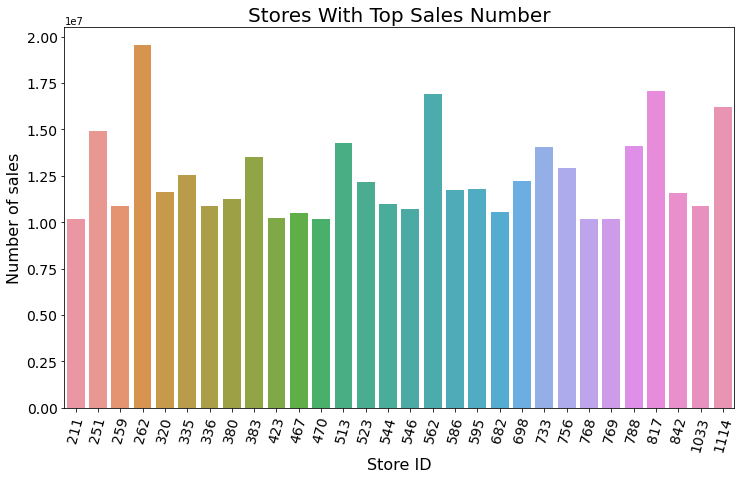

2022-05-25 17:57:35,611:logger:successfully displayed bar plot


In [32]:
store_combo = train_merged_df.groupby(by=['Store']).aggregate({'Sales': 'sum','Customers': 'sum'}).reset_index().sort_values(by="Sales",ascending=False)
# store_combo
plotter.plot_bar(store_combo.head(30),'Store','Sales','Stores With Top Sales Number','Store ID','Number of sales')

In [33]:
train_merged_df['Promo'].value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

In [34]:
train_merged_df['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: Int64

In [35]:
train_merged_df['SchoolHoliday'].value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

In [36]:
train_merged_df.groupby(by=['Store']).aggregate({'Promo': 'sum','SchoolHoliday': 'sum'}).reset_index() #.head(50).plot.bar(x='Store',y=['Promo','SchoolHoliday'],figsize=(10,5))

,Store,Promo,SchoolHoliday
0,1,360,193
1,2,360,167
2,3,360,170
3,4,360,173
4,5,360,172
...,...,...,...
1110,1111,360,170
1111,1112,360,170
1112,1113,360,159
1113,1114,360,169


<AxesSubplot:>

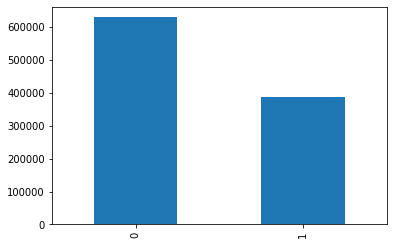

In [37]:
train_merged_df['Promo'].value_counts().plot(kind="bar")

<AxesSubplot:>

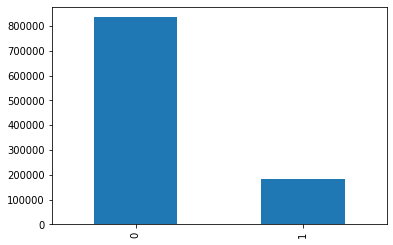

In [38]:
train_merged_df['SchoolHoliday'].value_counts().plot(kind="bar")

2022-05-25 17:57:38,322:logger:0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: Int64


<AxesSubplot:>

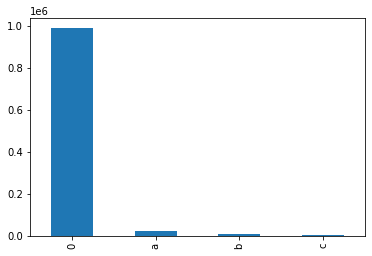

In [39]:
state = train_merged_df['StateHoliday'].value_counts() 
logger.info(state)
state.plot(kind="bar")

<AxesSubplot:ylabel='Sales'>

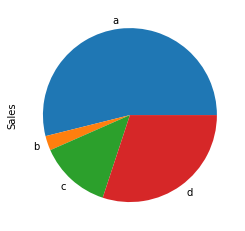

In [40]:
store_type = train_merged_df.groupby(by=['StoreType']).aggregate({'Sales': 'sum','Customers': 'sum'}) #.head(50).plot.bar(x='Store',y=['Promo','SchoolHoliday'],figsize=(10,5))
# logger.info(state)
store_type['Sales'].plot(kind="pie")



<AxesSubplot:ylabel='Customers'>

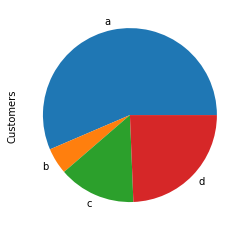

In [41]:
store_type['Customers'].plot(kind="pie")

In [42]:
#bivariate

In [43]:
train_merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Week_Number,...,day_of_year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,31,...,212,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
1,1,4,2015-07-30,5020,546,1,1,0,1,31,...,211,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
2,1,3,2015-07-29,4782,523,1,1,0,1,31,...,210,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
3,1,2,2015-07-28,5011,560,1,1,0,1,31,...,209,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
4,1,1,2015-07-27,6102,612,1,1,0,1,31,...,208,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"


<AxesSubplot:xlabel='DayOfWeek'>

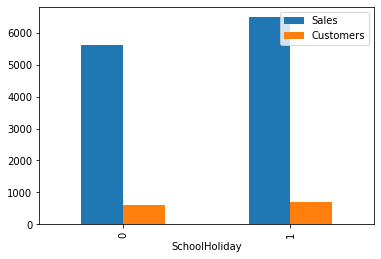

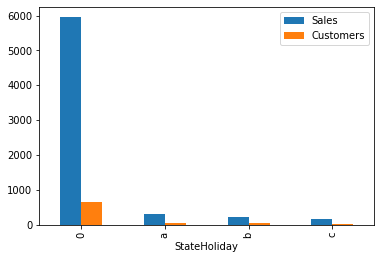

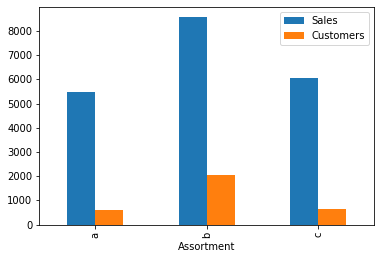

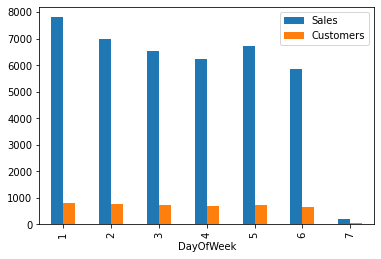

In [44]:
school_holiday = train_merged_df.groupby(by=['SchoolHoliday']).aggregate({'Sales': 'mean','Customers': 'mean'}) #.head(50).plot.bar(x='Store',y=['Promo','SchoolHoliday'],figsize=(10,5))
state_holiday = train_merged_df.groupby(by=['StateHoliday']).aggregate({'Sales': 'mean','Customers': 'mean'})
assortment = train_merged_df.groupby(by=['Assortment']).aggregate({'Sales': 'mean','Customers': 'mean'})
dayofweek = train_merged_df.groupby(by=['DayOfWeek']).aggregate({'Sales': 'mean','Customers': 'mean'})
# logger.info(state)
school_holiday.plot(kind="bar")
state_holiday.plot(kind="bar")
assortment.plot(kind="bar")
dayofweek.plot(kind="bar")



<AxesSubplot:>

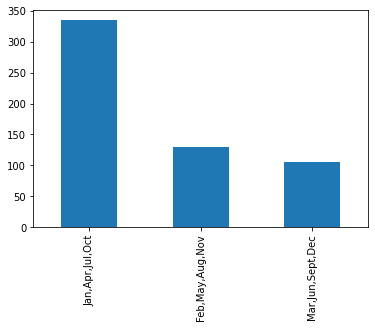

In [45]:
intervals = store_df[store_df['PromoInterval']!="Nan,Nan,Nan,Nan"]['PromoInterval'].value_counts()
intervals.plot(kind="bar")


Text(0.5, 1.0, 'Store Opened/Closed across days of week')

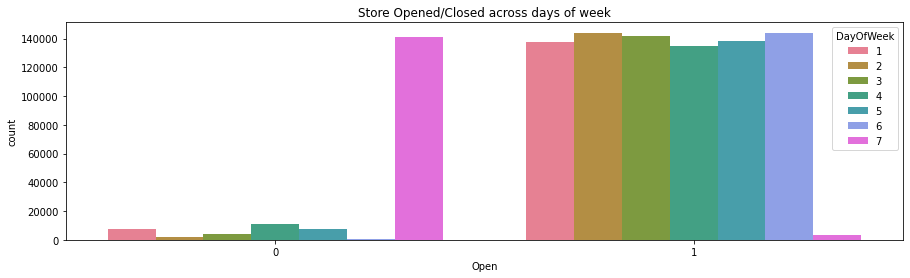

In [46]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek', data=train_merged_df,palette="husl", ax=axis1).set_title('Store Opened/Closed across days of week')

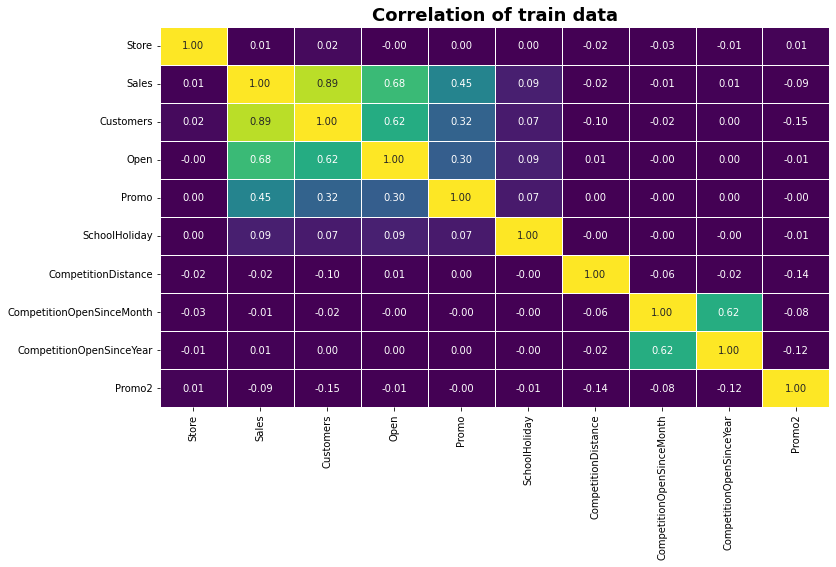

2022-05-25 17:57:48,117:logger:successfully displayed heatmap plot


In [47]:
corelated_df = train_merged_df[['Store','Sales','Customers','Open','Promo','StateHoliday','SchoolHoliday','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2']].corr()
corelated_df
plotter.plot_heatmap(corelated_df, "Correlation of train data")

In [48]:
logger.info(test_merged_df['Promo'].value_counts())
logger.info(train_merged_df['Promo'].value_counts())

2022-05-25 17:57:51,510:logger:0    24824
1    16264
Name: Promo, dtype: int64
2022-05-25 17:57:51,528:logger:0    629129
1    388080
Name: Promo, dtype: int64


In [49]:
x = train_merged_df[train_merged_df['StateHoliday'] == 'b'] #.groupby(by="Store")
x[x['Store'] == 1]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Week_Number,...,day_of_year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
116,1,1,2015-04-06,0,0,0,0,b,1,15,...,96,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
119,1,5,2015-04-03,0,0,0,1,b,1,14,...,93,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
466,1,1,2014-04-21,0,0,0,0,b,1,17,...,111,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
469,1,5,2014-04-18,0,0,0,1,b,1,16,...,108,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
851,1,1,2013-04-01,0,0,0,0,b,1,14,...,91,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
854,1,5,2013-03-29,0,0,0,1,b,1,13,...,88,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"


In [50]:
seasonal = train_merged_df.groupby(by='StateHoliday').agg({'Sales':'mean', 'Customers':'mean'})
seasonal = seasonal.iloc[1:,:]
seasonal

,Sales,Customers
StateHoliday,,
a,290.735686,43.817670
b,214.311510,36.561883
c,168.733171,27.174390


2022-05-25 17:57:53,592:logger:              Sales  Customers
Sales      1.000000   0.894711
Customers  0.894711   1.000000


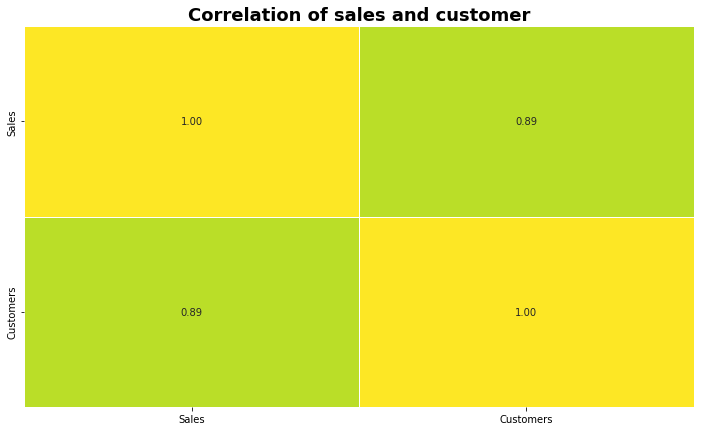

2022-05-25 17:57:53,763:logger:successfully displayed heatmap plot


In [51]:
corelated_df = train_merged_df[['Sales','Customers']].corr()
logger.info(corelated_df)
plotter.plot_heatmap(corelated_df, "Correlation of sales and customer")

In [52]:
train_d = train_merged_df.groupby(by="Promo").agg({"Sales": "mean" , "Customers": "mean"})
train_d

,Sales,Customers
Promo,,
0,4406.050805,517.823542
1,7991.152046,820.098815


In [53]:
train_d = train_df[['Store','Customers','Promo','Sales']]
train_store_customer = train_d.groupby(['Store','Promo']).agg({'Customers':'mean','Sales':'mean'})
train_store_customer

Customers         Sales
Store Promo                           
1     0       399.682131   3198.994845
      1       577.522222   5152.886111
2     0       366.876289   2855.058419
      1       678.702778   6172.816667
3     0       477.445017   3967.596220
...                  ...           ...
1113  1       754.250000   7320.086111
1114  0      2353.958763  14477.742268
      1      3165.383333  21601.497222
1115  0       297.800687   4082.221649
      1       457.122222   7073.266667

[2230 rows x 2 columns]

In [54]:
list = train_store_customer.Customers.values.tolist()
adder = []
next_index=0
for index,l in enumerate(list):
    if next_index == index:
        next_index+=2
        adder.append((list[index+1]-l)/l)
sum(adder)/(len(list)/2)*100

62.184235408598724

In [55]:
new_df = train_df[['Store', 'Customers']]
new_df = new_df.groupby('Store').agg({'Customers':'mean'})
new_df['Increase Percentage'] = adder
new_df.sort_values(by="Increase Percentage" , ascending=False)

,Customers,Increase Percentage
Store,,
198,280.987261,1.491901
607,343.744161,1.312951
575,405.160950,1.198461
271,655.680467,1.178575
635,494.096603,1.159036
...,...,...
353,1432.600849,0.058641
423,1886.130573,0.028580
85,1015.401274,-0.015771


2022-05-25 17:57:55,656:logger:              Promo  Customers
Promo      1.000000   0.316169
Customers  0.316169   1.000000


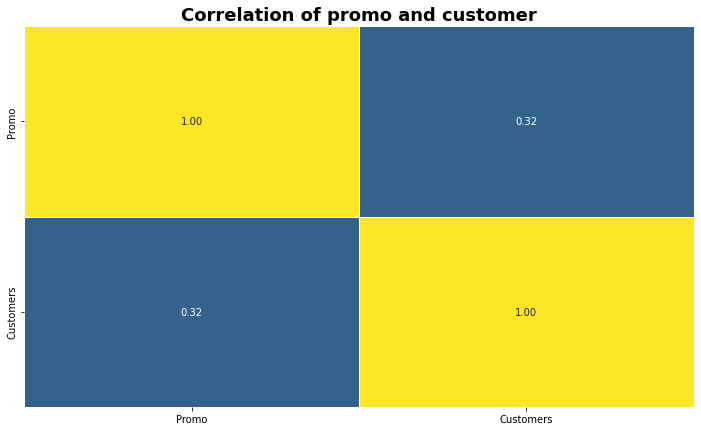

2022-05-25 17:57:55,886:logger:successfully displayed heatmap plot


In [56]:
corelated_df = train_merged_df[['Promo','Customers']].corr()
logger.info(corelated_df)
plotter.plot_heatmap(corelated_df, "Correlation of promo and customer")

In [57]:
weekdays_df = train_merged_df[train_merged_df['DayOfWeek'] <= 5]
no_holiday_df = weekdays_df[weekdays_df['StateHoliday'] == '0']
not_open_stores = no_holiday_df[no_holiday_df['Open'] == 0]
not_open_stores_list = not_open_stores['Store'].values.tolist()

closed_stores = train_merged_df[train_merged_df['Store'].isin(not_open_stores_list)]
open_stores = train_merged_df[~train_merged_df['Store'].isin(not_open_stores_list)]


<AxesSubplot:xlabel='DayOfWeek'>

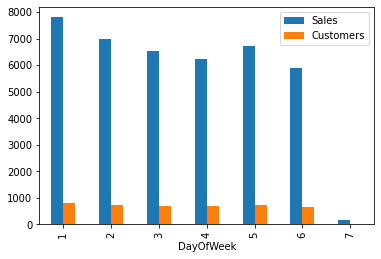

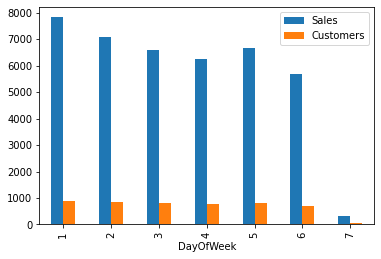

In [58]:
open_store_df = open_stores.groupby(['DayOfWeek']).agg({'Sales':'mean','Customers': 'mean'})
open_store_df.plot(kind="bar")
close_store_df = closed_stores.groupby(['DayOfWeek']).agg({'Sales':'mean','Customers': 'mean'})
close_store_df.plot(kind="bar")


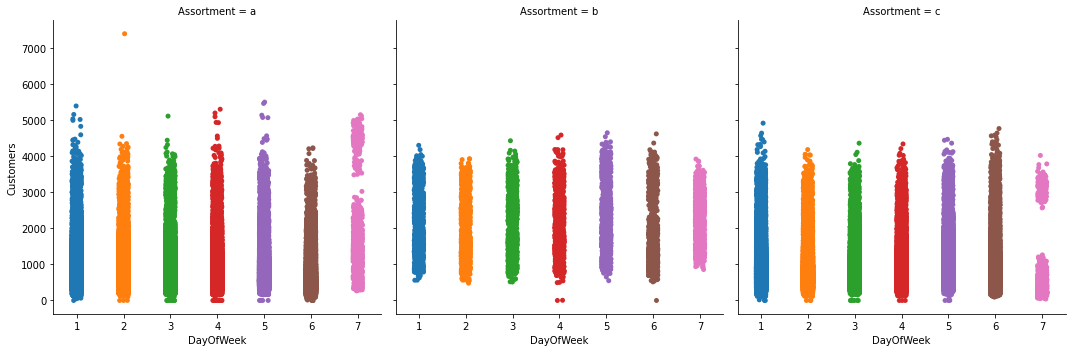

In [59]:
mask = (train_merged_df["Open"] != 0)

sns.catplot(data = train_merged_df[mask], x = 'DayOfWeek', y = 'Customers', col='Assortment', col_order=['a','b','c'])
plt.show()

In [60]:
competition_distance_df = train_merged_df[['Store','Sales','Customers','CompetitionDistance']]
store_competition_distance_group = competition_distance_df.groupby('Store').mean().reset_index()
store_competition_distance_group

,Store,Sales,Customers,CompetitionDistance
0,1,3945.704883,467.646497,1270.0
1,2,4122.991507,486.045648,570.0
2,3,5741.253715,620.286624,14130.0
3,4,8021.769639,1100.057325,620.0
4,5,3867.110403,444.360934,29910.0
...,...,...,...,...
1110,1111,4342.968153,373.548832,1900.0
1111,1112,8465.280255,693.498938,1880.0
1112,1113,5516.180467,596.763270,9260.0
1113,1114,17200.196391,2664.057325,870.0


2022-05-25 17:58:27,195:logger:                        Store     Sales  Customers  CompetitionDistance
Store                1.000000  0.010405   0.035162            -0.021815
Sales                0.010405  1.000000   0.838040            -0.044981
Customers            0.035162  0.838040   1.000000            -0.145296
CompetitionDistance -0.021815 -0.044981  -0.145296             1.000000


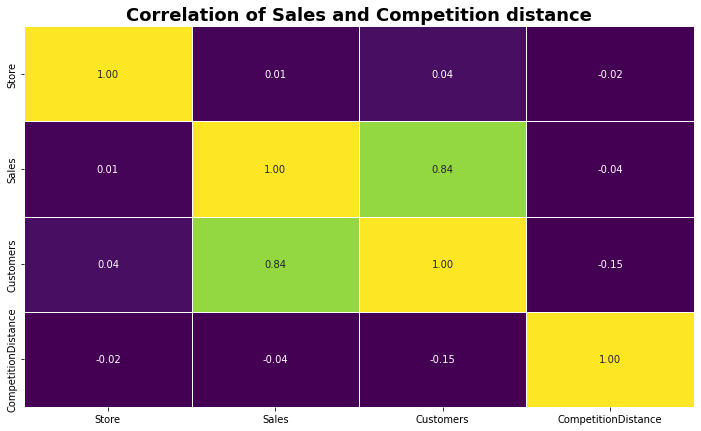

2022-05-25 17:58:27,981:logger:successfully displayed heatmap plot


In [61]:
corelated_df = store_competition_distance_group.corr()
logger.info(corelated_df)
plotter.plot_heatmap(corelated_df, "Correlation of Sales and Competition distance")

In [62]:
data = train_merged_df.copy()
data_before = data[(data['Year'] < data['CompetitionOpenSinceYear']) & (data['Month'] < data['CompetitionOpenSinceMonth'])].groupby('Store').agg({"Sales":"mean" , "Customers": "mean" , "CompetitionDistance": "mean"}).rename(columns={"Sales": "Before Sales" , "Customers": "Before Customer" , "CompetitionDistance": "Before CompetitionDistance"})
data_after = data[(data['Year'] >= data['CompetitionOpenSinceYear']) & (data['Month'] >= data['CompetitionOpenSinceMonth'])].groupby('Store').agg({"Sales":"mean" , "Customers": "mean" , "CompetitionDistance": "mean"}).rename(columns={"Sales": "After Sales" , "Customers": "After Customer" , "CompetitionDistance": "After CompetitionDistance"})
data_before

,Before Sales,Before Customer,Before CompetitionDistance
Store,,,
5,3649.161111,430.777778,29910.0
8,4166.150183,508.505495,7520.0
14,4393.000000,519.101695,1300.0
28,4477.054945,506.424908,1200.0
30,4956.161290,734.516129,40.0
...,...,...,...
1050,5725.584906,406.716981,13170.0
1053,7273.737569,831.895028,1710.0
1072,5526.608491,523.785377,5380.0


In [63]:
data_merged_df = pd.merge(data_before, data_after, how='inner', on='Store')
data_merged_df

,Before Sales,Before Customer,Before CompetitionDistance,After Sales,After Customer,After CompetitionDistance
Store,,,,,,
5,3649.161111,430.777778,29910.0,3855.213115,437.860656,29910.0
8,4166.150183,508.505495,7520.0,5345.967391,616.880435,7520.0
14,4393.000000,519.101695,1300.0,4631.381264,521.803922,1300.0
28,4477.054945,506.424908,1200.0,4031.489130,438.641304,1200.0
30,4956.161290,734.516129,40.0,3953.442718,574.689320,40.0
...,...,...,...,...,...,...
1044,5364.527778,735.155556,240.0,5165.327869,690.967213,240.0
1050,5725.584906,406.716981,13170.0,6491.496732,447.248366,13170.0
1053,7273.737569,831.895028,1710.0,7295.806452,825.774194,1710.0


In [64]:
data_merged_df['diff in Sales'] = data_merged_df['After Sales'] - data_merged_df['Before Sales']
data_merged_df['diff in Customer'] = data_merged_df['After Customer'] - data_merged_df['Before Customer']
data_merged_df 

,Before Sales,Before Customer,Before CompetitionDistance,After Sales,After Customer,After CompetitionDistance,diff in Sales,diff in Customer
Store,,,,,,,,
5,3649.161111,430.777778,29910.0,3855.213115,437.860656,29910.0,206.052004,7.082878
8,4166.150183,508.505495,7520.0,5345.967391,616.880435,7520.0,1179.817208,108.374940
14,4393.000000,519.101695,1300.0,4631.381264,521.803922,1300.0,238.381264,2.702227
28,4477.054945,506.424908,1200.0,4031.489130,438.641304,1200.0,-445.565815,-67.783604
30,4956.161290,734.516129,40.0,3953.442718,574.689320,40.0,-1002.718572,-159.826809
...,...,...,...,...,...,...,...,...
1044,5364.527778,735.155556,240.0,5165.327869,690.967213,240.0,-199.199909,-44.188342
1050,5725.584906,406.716981,13170.0,6491.496732,447.248366,13170.0,765.911826,40.531385
1053,7273.737569,831.895028,1710.0,7295.806452,825.774194,1710.0,22.068883,-6.120834
